In [113]:
from datetime import datetime
from os.path import split

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import datetime
import calendar

# Exercise 1

In [114]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("../laliga.sqlite")
df_matches = pd.read_sql_query("SELECT * from Matches", con)
df_predictions = pd.read_sql_query("SELECT * from Predictions", con)

con.close()

In [115]:
# def split_score(score):
#     if score is None:
#         return None
# 
#     score_split = score.split(":")
# 
#     if score_split[0] > score_split[1]:
#         return 1
#     elif score_split[0] < score_split[1]:
#         return 2
#     else:
#         return 'X'
    
def get_home_score(score):
    if score is None:
        return None

    score_split = score.split(":")

    return int(score_split[0])

def get_away_score(score):
    if score is None:
        return None

    score_split = score.split(":")

    return int(score_split[1])

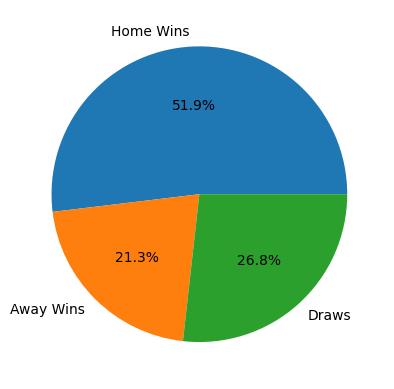

In [116]:
df_matches['home_score'] = df_matches.apply(lambda row: get_home_score(row['score']),
                                            axis=1)
df_matches['away_score'] = df_matches.apply(lambda row: get_away_score(row['score']),
                                            axis=1)
df_matches['winner'] = df_matches.apply(lambda row: None if row['home_score'] is None or row['away_score'] is None
                                        else 1 if row['home_score'] > row['away_score']
                                        else 2 if row['home_score'] < row['away_score']
                                        else 'X', axis=1)

count_home_wins = df_matches[df_matches['winner'] == 1].shape[0]
count_away_wins = df_matches[df_matches['winner'] == 2].shape[0]
count_draws = df_matches[df_matches['winner'] == 'X'].shape[0]
total_wins = count_home_wins + count_away_wins + count_draws

y = np.array([count_home_wins, count_away_wins, count_draws])
labels = ['Home Wins', 'Away Wins', 'Draws']

plt.pie(y, labels=labels, autopct="%1.1f%%")
plt.show()

# Exercise 2

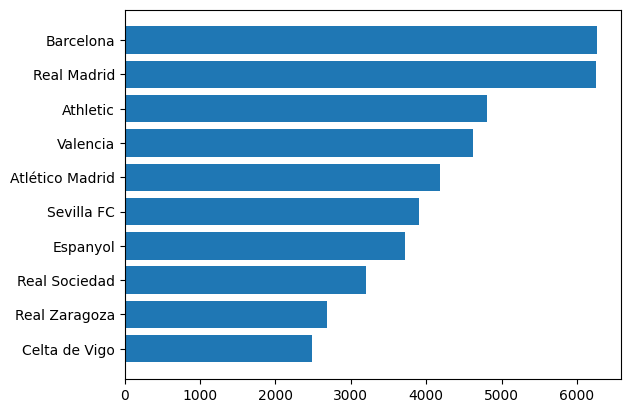

In [117]:
df_rank = pd.concat([df_matches[df_matches['division'] == 1][['home_team', 'home_score']].groupby(['home_team']).agg(['sum']), df_matches[df_matches['division'] == 1][['away_team', 'away_score']].groupby(['away_team']).agg(['sum'])], axis = 1)

df_rank['total'] = df_rank['home_score'] + df_rank['away_score']

top_10 = df_rank[['total']].sort_values('total', ascending = False).head(10)

plt.barh(list(top_10.index)[::-1], list(top_10['total'])[::-1])
plt.show()

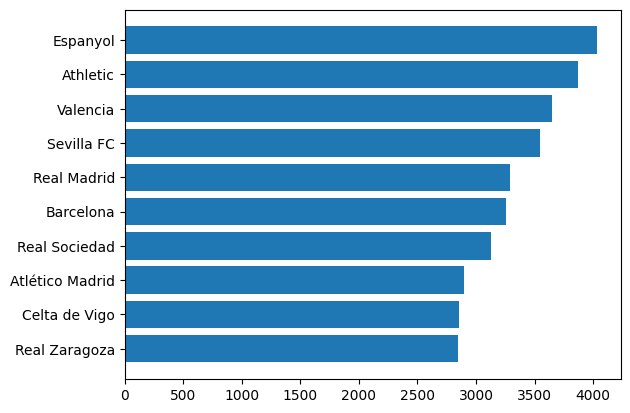

In [118]:
df_concede = pd.concat([df_matches[df_matches['division'] == 1][['home_team', 'away_score']].groupby(['home_team']).agg(['sum']), df_matches[df_matches['division'] == 1][['away_team', 'home_score']].groupby(['away_team']).agg(['sum'])], axis = 1)
df_concede['total'] = df_concede['home_score'] + df_concede['away_score']
top_10_concede = df_concede[['total']].sort_values('total', ascending = False).head(10)

plt.barh(list(top_10_concede.index)[::-1], list(top_10_concede['total'])[::-1])
plt.show()

In [119]:
df_matches['difference'] = abs(df_matches['home_score'] - df_matches['away_score'])
df_matches[['date', 'home_team', 'away_team', 'score', 'difference']].sort_values('difference', ascending = False).head(10)

,date,home_team,away_team,score,difference
25995,1/8/41,Real Sociedad,Real Valladolid,14:2,12.0
225,2/8/31,Athletic,Barcelona,12:1,11.0
27533,1/13/57,Real Gijón,Lérida,11:0,11.0
936,9/29/40,Sevilla FC,Barcelona,11:1,10.0
26884,9/4/49,CE Sabadell,SD Erandio Club,11:1,10.0
1071,9/28/41,Sevilla FC,Real Oviedo,10:0,10.0
28591,11/11/62,Real Sociedad,CE Sabadell,11:1,10.0
1168,1/11/42,Athletic,Celta de Vigo,10:0,10.0
2787,11/19/50,Athletic,Lérida,10:0,10.0
4428,10/20/57,Atlético Madrid,UD Las Palmas,9:0,9.0


# excercise 3

In [120]:
df_matches

,season,division,matchday,date,time,home_team,away_team,score,home_score,away_score,winner,difference
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2.0,3.0,2,1.0
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3.0,2.0,1,1.0
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5.0,0.0,1,5.0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1.0,1.0,X,0.0
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0.0,2.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,NaN,NaN,X,NaN
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,NaN,NaN,X,NaN
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,NaN,NaN,X,NaN
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,NaN,NaN,X,NaN


In [125]:
def get_year(season, date):
    year = date.split("/")[-1]
    
    season_years = season.split("-")
    
    for season_year in season_years:
        if year == season_year[2:4]:
            return f"{date.split("/")[0]}/{date.split("/")[1]}/{season_year}"
    
df_matches['date'] = df_matches.apply(lambda row: get_year(row['season'], row['date']), axis=1)

df_matches['date'] = pd.to_datetime(df_matches['date'], format='mixed')

In [126]:
df_matches['weekday'] = df_matches.apply(lambda row: row['date'].weekday(), axis=1)

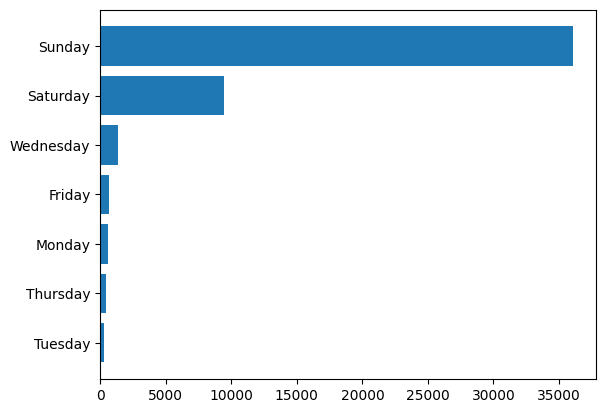

In [127]:
weekday_counts = df_matches[['weekday']].value_counts()
index_list = weekday_counts.index.get_level_values(0).tolist()  # Get the index (weekdays)
value_list = weekday_counts.values.tolist()  # Get the counts (values)
weekday_names = [calendar.day_name[i] for i in index_list]

plt.barh(weekday_names[::-1], value_list[::-1])
plt.show()

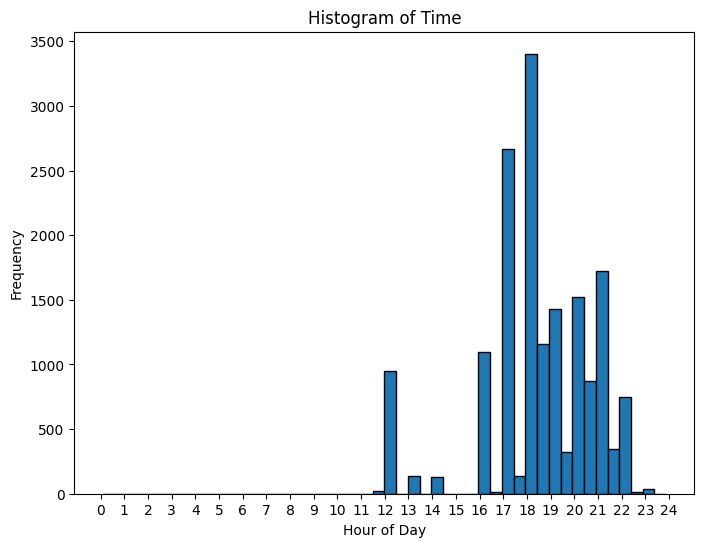

In [128]:
# Convert the time column to datetime format
df_matches['time'] = pd.to_datetime(df_matches['time'], format='%I:%M %p')

# Extract the time as hours and minutes for plotting
df_matches['hour'] = df_matches['time'].dt.hour + df_matches['time'].dt.minute / 60

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_matches['hour'], bins=48, edgecolor='black')
plt.title('Histogram of Time')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 25))
plt.show()

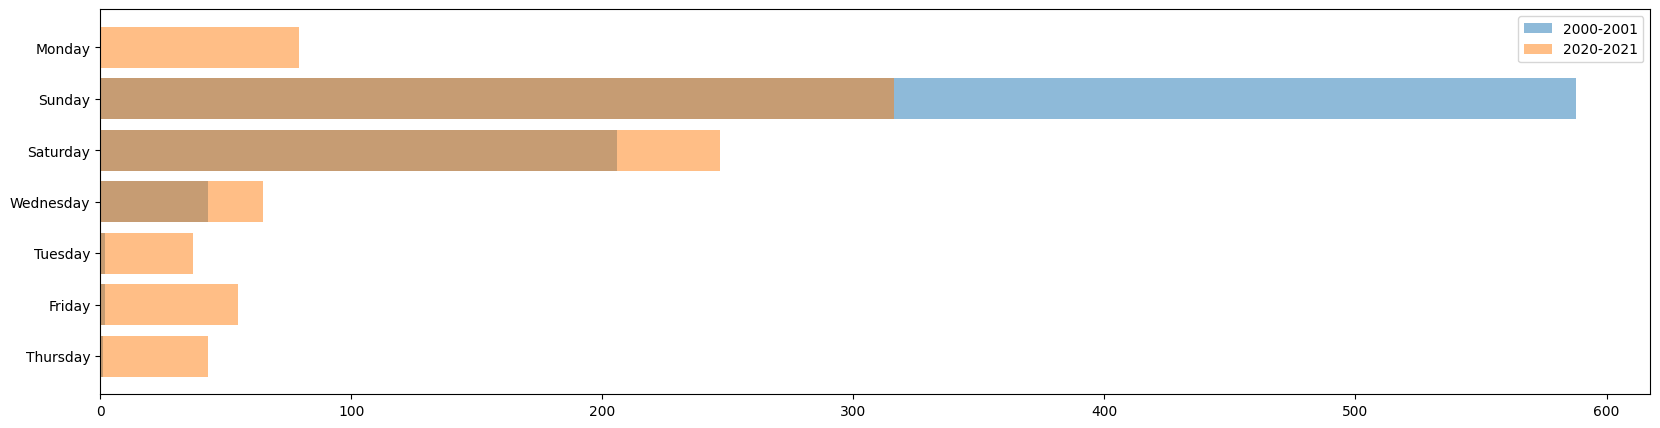

In [179]:
counts_2000_2001 = df_matches[df_matches['season'] == '2000-2001'][['weekday']].value_counts()
counts_2020_2021 = df_matches[df_matches['season'] == '2020-2021'][['weekday']].value_counts()

index_list_2000_2001 = counts_2000_2001.index.get_level_values(0).tolist()  # Get the index 
value_list_2000_2001 = counts_2000_2001.values.tolist()  # Get the counts (values)
weekday_names_2000_2001 = [calendar.day_name[i] for i in index_list_2000_2001]

index_list_2020_2021 = counts_2020_2021.index.get_level_values(0).tolist()  # Get the index 
value_list_2020_2021 = counts_2020_2021.values.tolist()  # Get the counts (values)
weekday_names_2020_2021 = [calendar.day_name[i] for i in index_list_2020_2021]

fig, ax = plt.subplots(figsize=(20,5))

ax.barh(weekday_names_2000_2001[::-1], value_list_2000_2001[::-1], alpha = 0.5, label='2000-2001')
ax.barh(weekday_names_2020_2021[::-1], value_list_2020_2021[::-1], alpha = 0.5, label='2020-2021')
plt.legend()

plt.show()

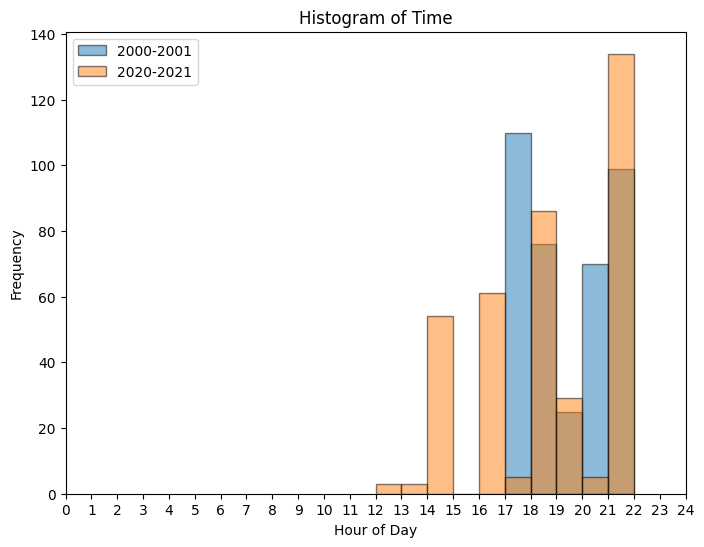

In [192]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_matches[(df_matches['season'] == '2000-2001') & (df_matches['division'] == 1)]['hour'], bins=5, alpha=0.5, edgecolor='black', label='2000-2001')
plt.hist(df_matches[(df_matches['season'] == '2020-2021') & (df_matches['division'] == 1)]['hour'], bins=10, alpha=0.5, edgecolor='black', label='2020-2021')
plt.title('Histogram of Time')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 25))
plt.legend()
plt.show()

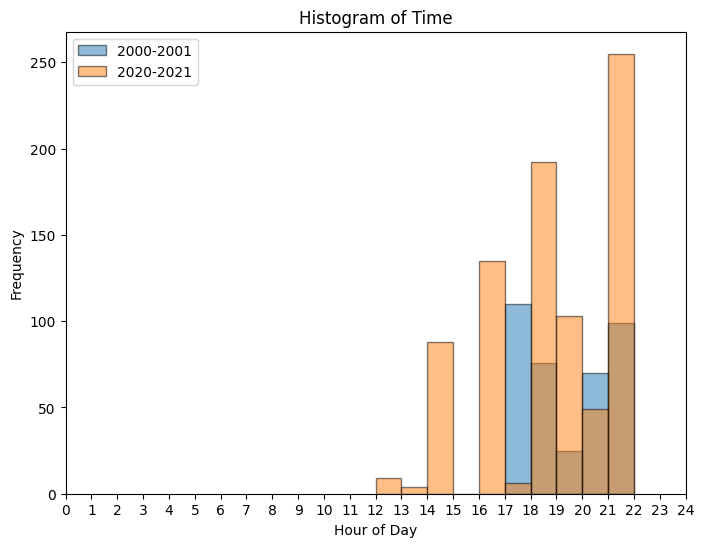

In [193]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_matches[(df_matches['season'] == '2000-2001')]['hour'], bins=5, alpha=0.5, edgecolor='black', label='2000-2001')
plt.hist(df_matches[(df_matches['season'] == '2020-2021')]['hour'], bins=10, alpha=0.5, edgecolor='black', label='2020-2021')
plt.title('Histogram of Time')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 25))
plt.legend()
plt.show()

# Exercise 4